In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('videogames-sales-dataset/Video_Games_Sales_as_at_22_Dec_2016.csv',
                 encoding='latin1')

In [44]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16450.0,2006.487356,5.878995,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16719.0,0.263330,0.813514,0.00,0.00,0.08,0.24,41.36
EU_Sales,16719.0,0.145025,0.503283,0.00,0.00,0.02,0.11,28.96
JP_Sales,16719.0,0.077602,0.308818,0.00,0.00,0.00,0.04,10.22
Other_Sales,16719.0,0.047332,0.186710,0.00,0.00,0.01,0.03,10.57
Global_Sales,16719.0,0.533543,1.547935,0.01,0.06,0.17,0.47,82.53
Critic_Score,8137.0,68.967679,13.938165,13.00,60.00,71.00,79.00,98.00
Critic_Count,8137.0,26.360821,18.980495,3.00,12.00,21.00,36.00,113.00
User_Score,7590.0,7.125046,1.500006,0.00,6.40,7.50,8.20,9.70
User_Count,7590.0,162.229908,561.282326,4.00,10.00,24.00,81.00,10665.00


In [46]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [47]:
# Limpieza de Datos

df = df.rename(columns={'Year_of_Release':'Year'})

df = df.dropna(subset=['Year'])

df = df.fillna({
    'Name':'Unknown', 
    'Developer':'Unknown',
    'Genre': df['Genre'].mode()[0],
    'Publisher': df['Publisher'].mode()[0],
    'Rating': 'No clasificado',
    'Critic_Score' : df['Critic_Score'].median(),
    'Critic_Count': df['Critic_Count'].median(),
    'User_Score': df.User_Score.median(),
    'User_Count': df.User_Count.median()
})

df['Year'] = df['Year'].astype(int)

df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
Critic_Score    0
Critic_Count    0
User_Score      0
User_Count      0
Developer       0
Rating          0
dtype: int64

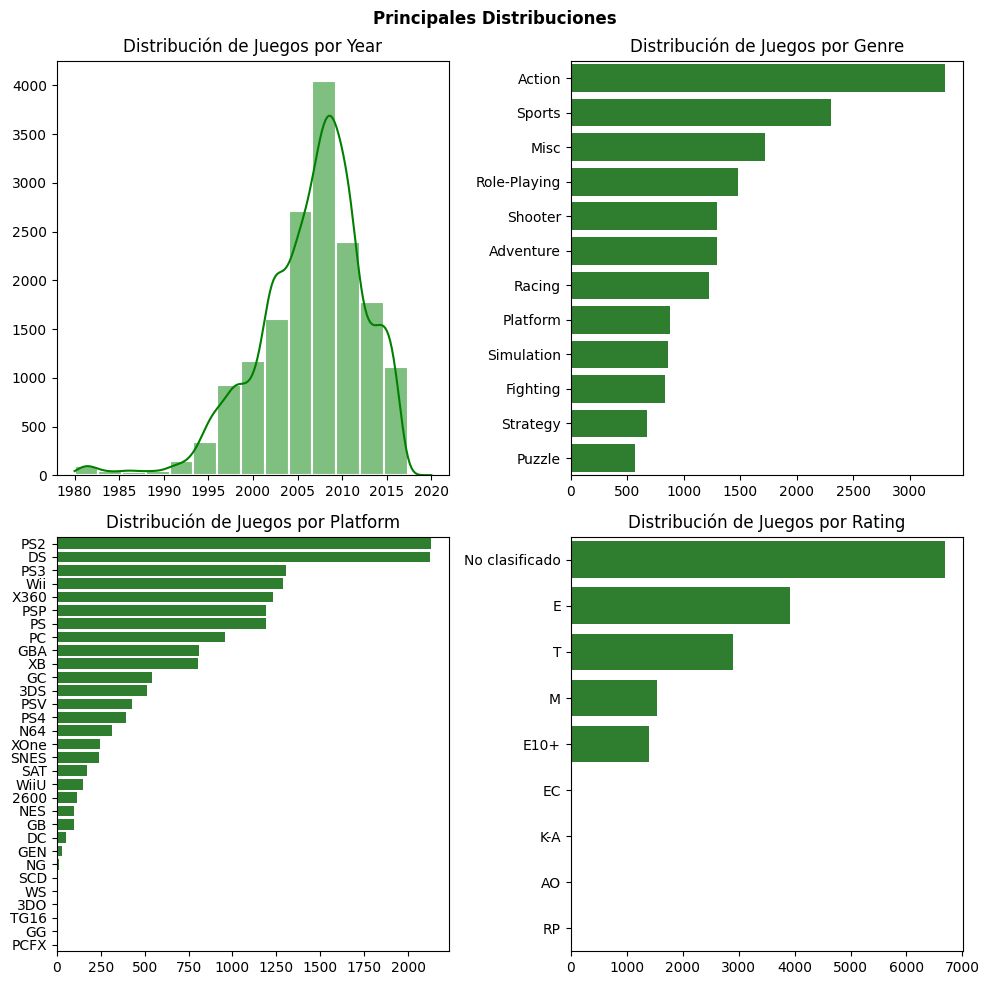

In [48]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

fig.suptitle('Principales Distribuciones', fontweight='bold')
ax = ax.flatten()

it1 = ['Genre', 'Platform', 'Rating']

sns.histplot(data=df, x='Year', ax=ax[0], bins=15, kde=True, color='green', 
            edgecolor='white', linewidth=1.5)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title(f'Distribución de Juegos por Year')

for i, x in enumerate(it1):
    graf = df[x].value_counts().reset_index()
    
    i += 1
    sns.barplot(data=graf, y=x, x='count', ax=ax[i], color='forestgreen')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title(f'Distribución de Juegos por {x}')    

plt.tight_layout()
plt.show()

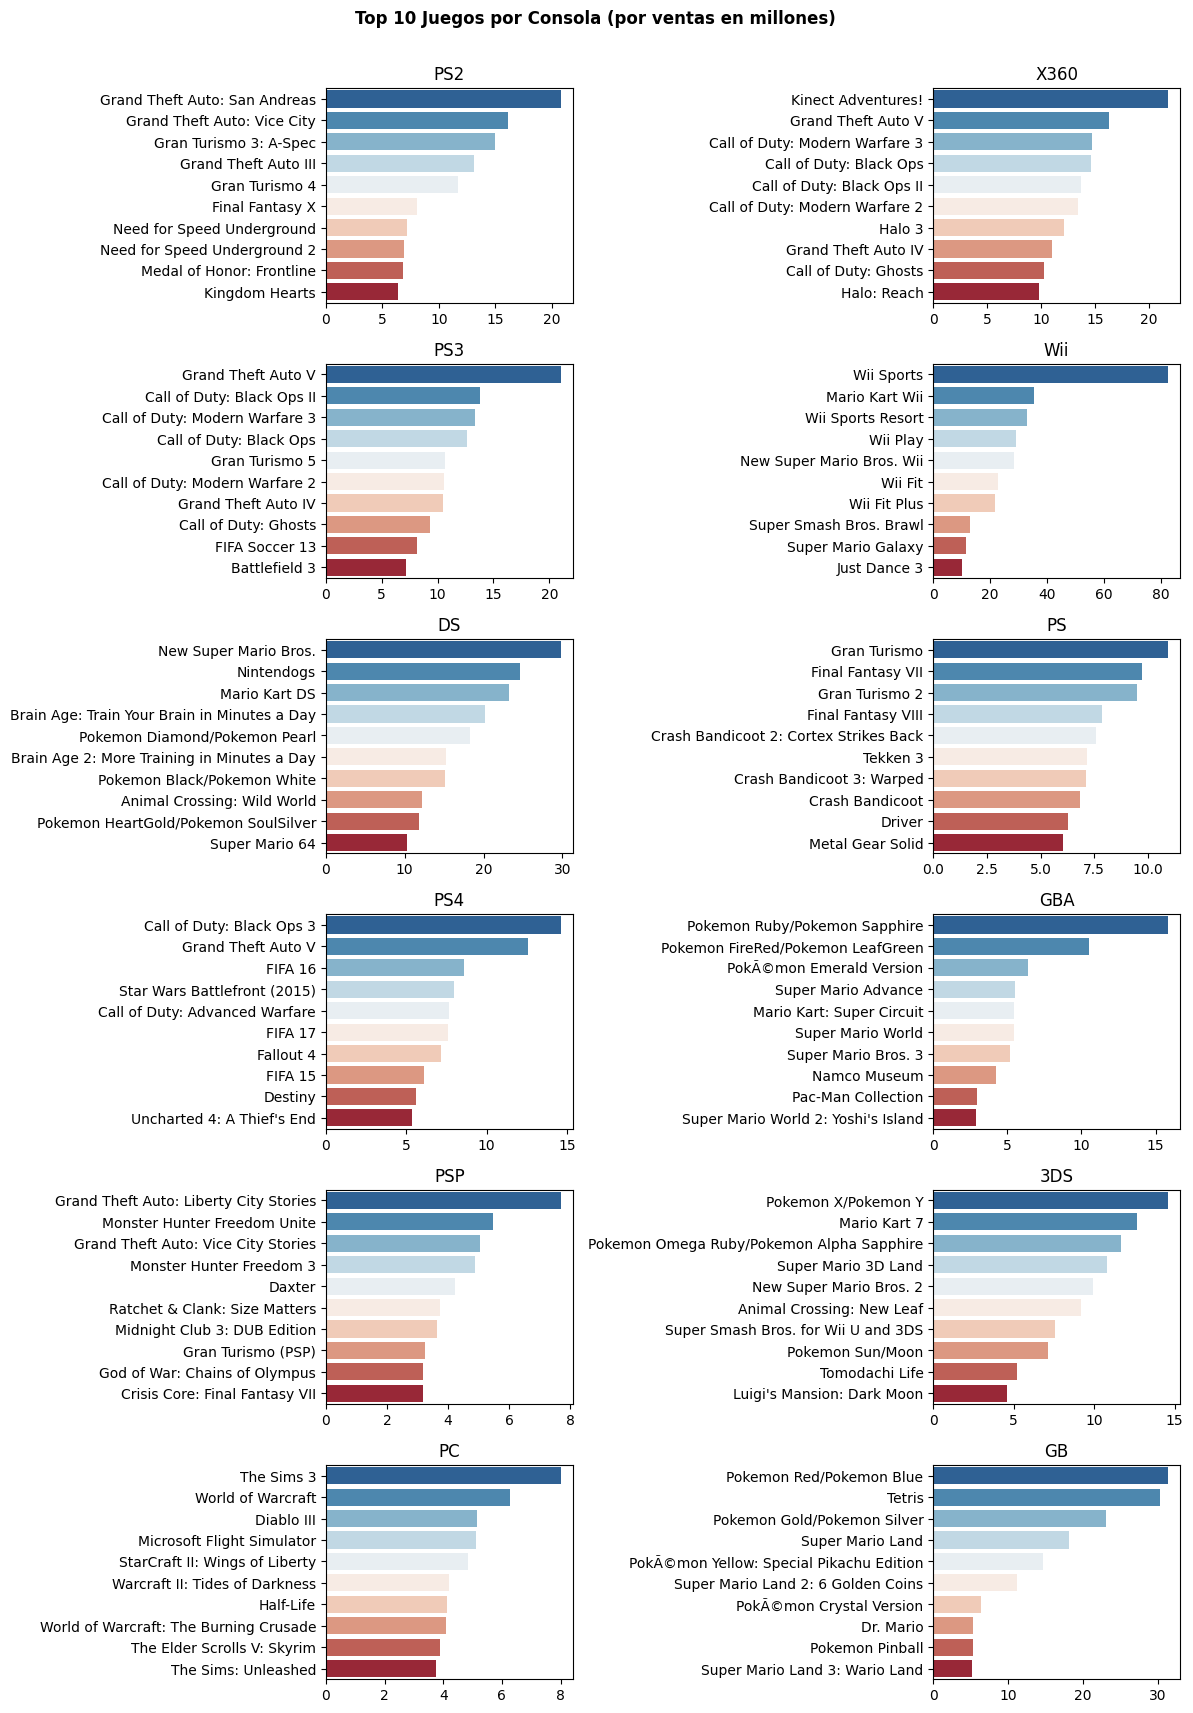

In [ ]:
# TOP 10 JUEGOS POR CONSOLA
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(12,17))
fig.suptitle('Top 10 Juegos por Consola (por ventas en millones)', 
             fontweight='bold', y=1.005 )
ax = ax.flatten()

# Lista de top 10 consolas en ventas
top_10_p = df.groupby('Platform')['Global_Sales'].sum() \
    .sort_values(ascending=False)[:12].index

for i, console in enumerate(top_10_p):
    # Lista de top 10 juegos por consola
    top_10_j = df[df['Platform'] == console] \
        .sort_values(by='Global_Sales', ascending=False)\
            [['Name', 'Global_Sales']][:10]
            
    # Gráfico
    sns.barplot(data=top_10_j, y='Name', x='Global_Sales', ax=ax[i], 
                palette='RdBu_r', hue='Name')
    ax[i].set_title(console)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

In [88]:
top_10_p = df.groupby('Platform')['Global_Sales'].sum() \
    .sort_values(ascending=False)[:10].index

top_10_j = df[df['Platform'] == console] \
    .sort_values(by='Global_Sales', ascending=False)\
        [['Platform','Name', 'Global_Sales']][:10]
        
display(top_10_j)

,Platform,Name,Global_Sales
6,DS,New Super Mario Bros.,29.80
10,DS,Nintendogs,24.67
11,DS,Mario Kart DS,23.21
19,DS,Brain Age: Train Your Brain in Minutes a Day,20.15
20,DS,Pokemon Diamond/Pokemon Pearl,18.25
26,DS,Brain Age 2: More Training in Minutes a Day,15.29
27,DS,Pokemon Black/Pokemon White,15.14
43,DS,Animal Crossing: Wild World,12.13
46,DS,Pokemon HeartGold/Pokemon SoulSilver,11.77
59,DS,Super Mario 64,10.30
